In [85]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [86]:
# read data 
df = pd.read_csv("Book1.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


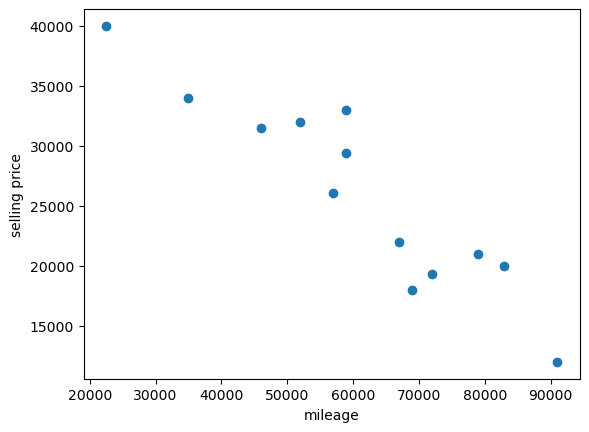

In [87]:
# checking if regression is applicable ?
plt.scatter(df.Mileage,df['Sell Price($)'])
plt.xlabel("mileage")
plt.ylabel("selling price")
plt.show()

In [88]:
# creating dummies 
dumies = pd.get_dummies(df['Car Model'])
dumies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [89]:
# using concat fun
merged = pd.concat([df,dumies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [90]:
# deleting unnecessary columns 
final = merged.drop(['Car Model'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [97]:
# applying regression
model = LinearRegression()
X=final.drop(['Sell Price($)'],axis='columns').values
y=final['Sell Price($)'].values


model.fit(X,y)
model.predict([[35000,3,0,1,0]])


array([35286.78445645])

In [98]:
# accuracy of model
model.score(X,y)

0.9417050937281082

Price of mercedez benz that is 4 yr old with mileage 45000

In [99]:
model.predict([[45000,4,0,0,1]])

array([36991.31721061])

Price of BMW X5 that is 7 yr old with mileage 86000

In [100]:
model.predict([[86000,7,0,1,0]])

array([11080.74313219])